In [1]:
%%file passing_stimuli_solution.py

import numpy as np
import matplotlib.pyplot as plt

import pyNN.hardware.spikey as pynn

pynn.setup()

spike_train = np.linspace(0, 100, 21)
stimulus = pynn.Population(1, pynn.SpikeSourceArray, {'spike_times': spike_train})
neurons = pynn.Population(2, pynn.IF_facets_hardware1)

neurons.record()
pynn.record_v(neurons[1], "")

weight = 15 * pynn.minExcWeight()

proj_stim = pynn.Projection(stimulus, neurons,
       pynn.FromListConnector([(0, 0, weight, 0)]),
       target="excitatory")

proj_inter = pynn.Projection(neurons, neurons,
       pynn.FromListConnector([(0, 1, weight, 0)]),
       target="excitatory")

pynn.run(200.0)

time = pynn.timeMembraneOutput
trace = pynn.membraneOutput

pynn.end()

fig = plt.figure(figsize=(12, 6))
ax = fig.gca()

ax.set_xlabel(r"time [\si{\milli\second}]")
ax.set_ylabel(r"membrane voltage [\si{\milli\volt}]")

ax.plot(time, trace)

fig.savefig("passing_stimuli_solution.png")

Writing passing_stimuli_solution.py


In [2]:
! srun --gres=station549 python passing_stimuli_solution.py

/wang/environment/software/jessie/spikey/github_20170208/lib/python2.7/site-packages/pyNN/random.py:25: UserWarning: GSL random number generators not available
  warnings.warn("GSL random number generators not available")
INFO  HAL.Ctr Retrieved station549 from environment variable MY_STAGE1_STATION
INFO  HAL.Ctr Config successfully loaded from file /wang/environment/software/jessie/spikey/github_20170208/spikeyhal/config/station549.cfg
INFO  HAL.Ctr Opening FPGA board with serial B291663
INFO  PyN.wks Using station station549
INFO  HAL.Spi Found Spikey 5.
INFO  PyN.cfg Calibrations NeuronMems Icb bioDynrange NOT loaded!
INFO  HAL.PyS Hardware config written (enable loglevel 3 to list parameter names)
WARN  HAL.SCM SC_Mem::Flush: playback memory already flushed!
INFO  PyN.cfg Monitoring hardware neuron 1 (on membrane readout pin 1)
WARN  HAL.Cal vout#37 set to 0.02 but valid range is: 0.1158 - 1.72
WARN  HAL.Cal vout#38 set to 0.02 but valid range is: 0.1267 - 1.722
WARN  HAL.Cal vout#

In [3]:
from IPython.display import Image

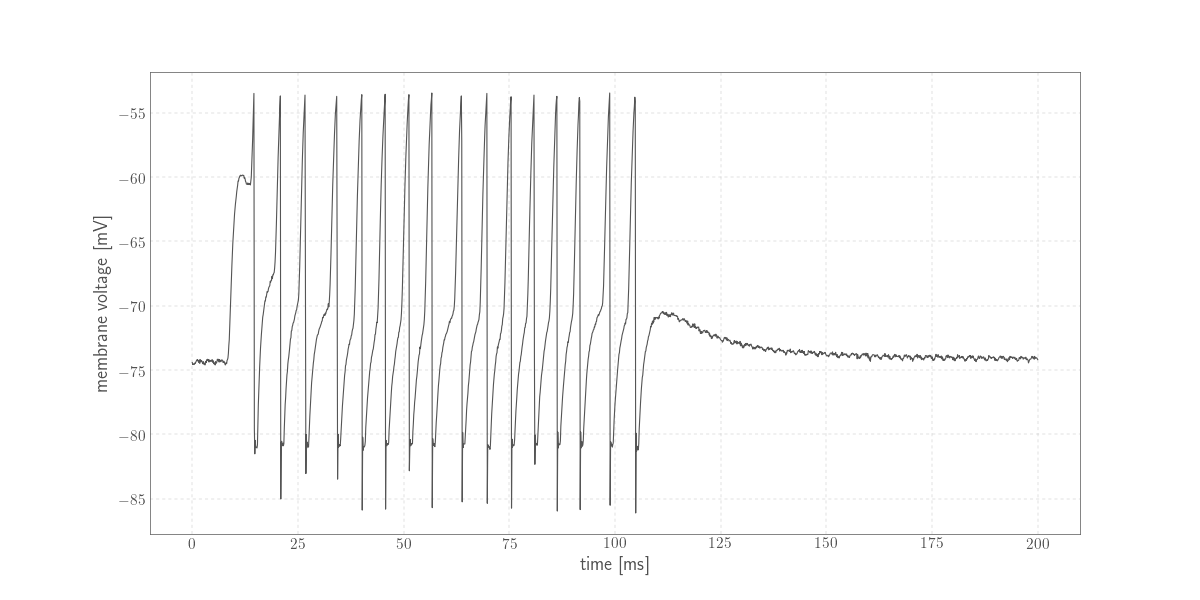

In [4]:
Image(filename="passing_stimuli_solution.png")